<a href="https://colab.research.google.com/github/Taehee-K/ASAP/blob/main/visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = os.path.dirname(os.path.abspath(__file__))
os.chdir(path)

In [ ]:
import os
from typing import Tuple, List, Sequence, Callable, Dict

import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Visualization

In [ ]:
def draw_keypoints(
    image: np.ndarray,
    keypoints: np.ndarray,
    edges: List[Tuple[int, int]] = None,
    keypoint_names: Dict[int, str] = None, 
    boxes: bool = True,
    dpi: int = 200
) -> None:
    """
    Args:
        image (ndarray): [H, W, C]
        keypoints (ndarray): [N, 3]
        edges (List(Tuple(int, int))): 
    """
    np.random.seed(42)
    colors = {k: tuple(map(int, np.random.randint(0, 255, 3))) for k in range(24)}

    if boxes:
        x1, y1 = min(keypoints[:, 0]), min(keypoints[:, 1])
        x2, y2 = max(keypoints[:, 0]), max(keypoints[:, 1])
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 100, 91), thickness=3)

    for i, keypoint in enumerate(keypoints):
        cv2.circle(
            image, 
            tuple(keypoint), 
            3, colors.get(i), thickness=3, lineType=cv2.FILLED)

        if keypoint_names is not None:
            cv2.putText(
                image, 
                f'{i}: {keypoint_names[i]}', 
                tuple(keypoint), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    if edges is not None:
        for i, edge in enumerate(edges):
            cv2.line(
                image, 
                tuple(keypoints[edge[0]]), 
                tuple(keypoints[edge[1]]),
                colors.get(edge[0]), 3, lineType=cv2.LINE_AA)
    
    fig, ax = plt.subplots(dpi=dpi)
    plt.imshow(image)
    ax.axis('off')
    plt.show()

(1280, 720, 3)


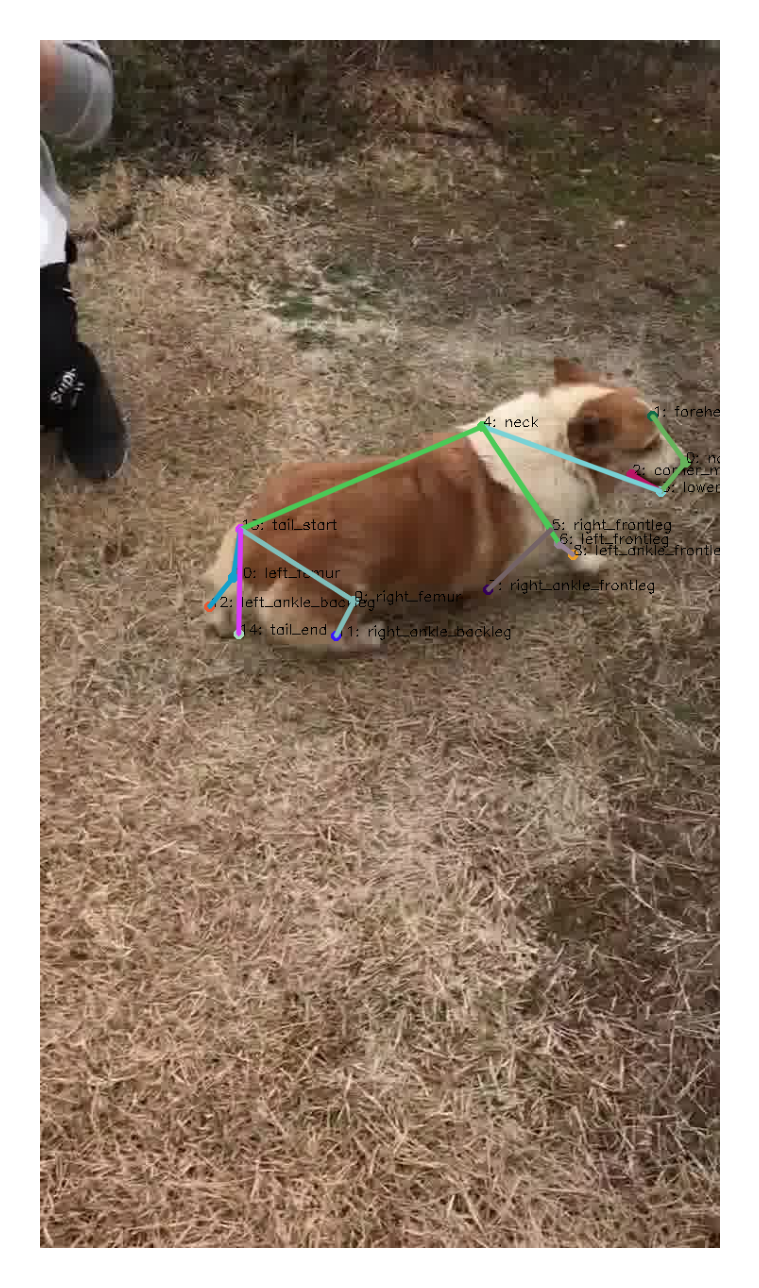

In [ ]:
df = pd.read_csv('./annotations/annotations_1.csv', index_col = 'image')
keypoints = df.loc['dog-walkrun-066887/frame_162_timestamp_5400.jpg'].values.reshape(-1, 2)
keypoints = keypoints.astype(np.int64)
keypoint_names = {
    0: 'nose',
    1: 'forehead',
    2: 'corner_mouth',
    3: 'lower_lip', 
    4: 'neck', 
    5: 'right_frontleg', 
    6: 'left_frontleg',
    7: 'right_ankle_frontleg', 
    8: 'left_ankle_frontleg',
    9: 'right_femur', 
    10: 'left_femur',
    11: 'right_ankle_backleg', 
    12: 'left_ankle_backleg',
    13: 'tail_start', 
    14: 'tail_end',
}

edges = [
    (0, 1), (0, 3), (2, 3), (3, 4), (4, 6), (6, 8), (4, 5),
    (5, 7), (4, 13), (10, 13), (10, 12), (9, 13), (9, 11),
    (13, 14)
]

image = cv2.imread("frame_162_timestamp_5400.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
draw_keypoints(image, keypoints, edges, keypoint_names, boxes=False, dpi=400)